# Abgabe 5 

Aufgabe 1

In [1]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([3, 8, 2, 9, 6, 4, 5, 7, 1]), tensor([ 0, 10]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [5]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")     

Epoch 1, Training loss 159.4146, Validation loss 199.2328
Epoch 1000, Training loss 8.0723, Validation loss 12.0262
Epoch 2000, Training loss 2.6800, Validation loss 4.0052
Epoch 3000, Training loss 2.0977, Validation loss 3.4175
Epoch 4000, Training loss 1.9318, Validation loss 3.6873
Epoch 5000, Training loss 1.7608, Validation loss 4.1859


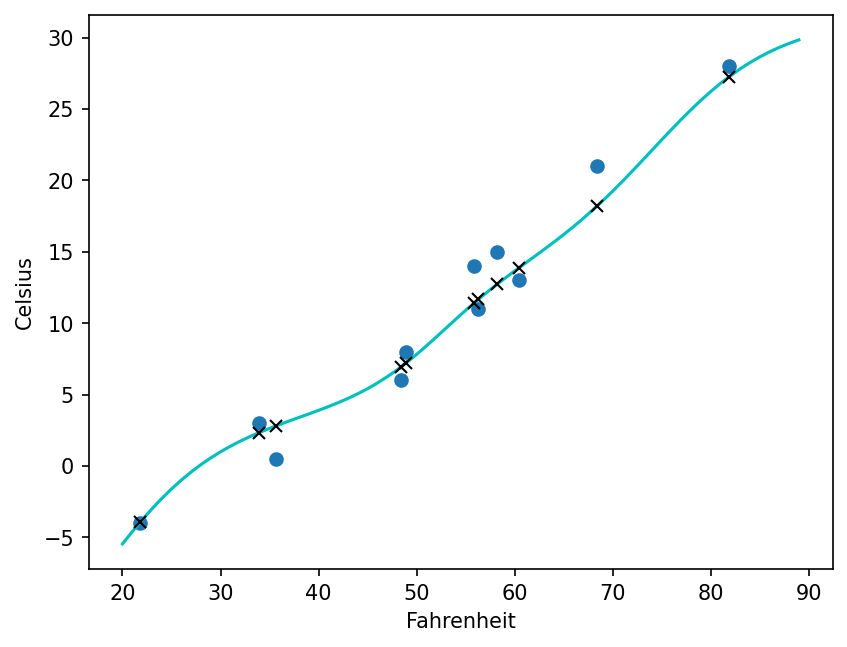

In [8]:
# Overfiting
from collections import OrderedDict
neuron_count = 30

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 161.5159, Validation loss 201.4727
Epoch 1000, Training loss 3.8465, Validation loss 2.8275
Epoch 2000, Training loss 2.6170, Validation loss 2.0295
Epoch 3000, Training loss 2.2332, Validation loss 1.9058
Epoch 4000, Training loss 2.1984, Validation loss 1.6969
Epoch 5000, Training loss 2.0422, Validation loss 1.8795


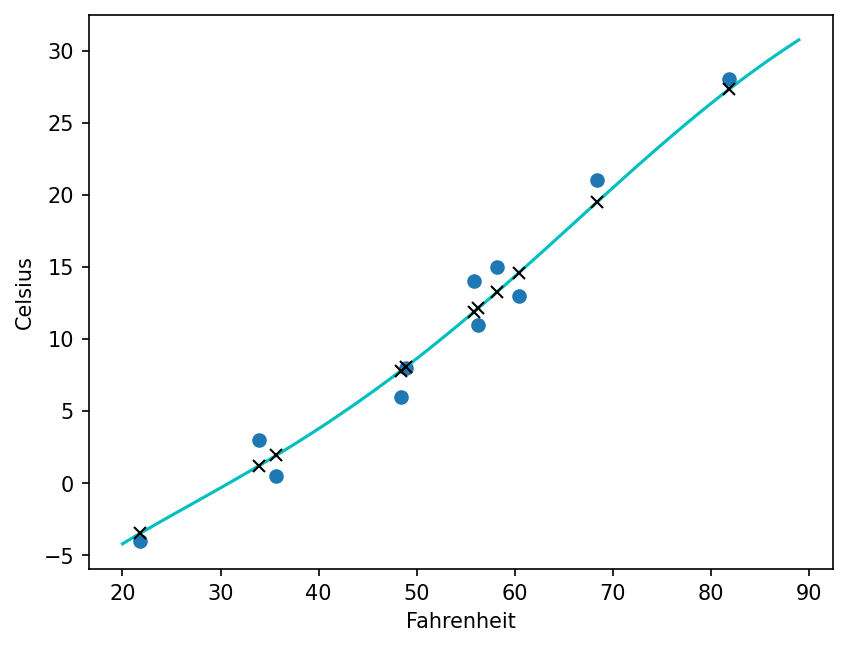

In [7]:
# Nahezu lineares Verhalten
neuron_count = 30

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Experimentieren Sie mit der Anzahl der versteckten Neuronen und der Lernrate . Welche Änderungen erzeugen ein lineares Ausgangsverhalten und welche Änderungen führen zu starkem "Overfiting"?

Bei gleichbleibender Learning Rate und unterschiedlich vielen Neuronen verhält sich das Ausgangsverhalten ähnlich. Bei gleichbleibenden Neuronen und unterschiedlicher Learning Rate gibt es größerer Unterschiede. Wenn eine größere Learning Rate gewählt wird, kommt es zum "Overfitting" und bei einer kleineren Learning Rate kann ein nahezu lineares Verhalten beobachtet werden. Ein komplett lineares Verhalten kann nicht beobachtet werden, da die Aktivierungsfunktion, die hier die Funktion Tanh ist, dem entgegenwirkt.